In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
train_dataset = dsets.MNIST(root="./data",
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

In [3]:
len(train_dataset)

60000

1


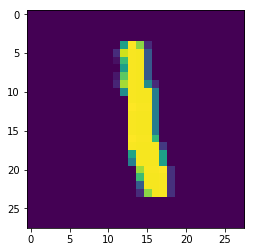

In [4]:
show_img = train_dataset.train_data[6].numpy().reshape(28,28)
label = train_dataset.train_labels[6]
print(label)
plt.imshow(show_img)


In [5]:
test_dataset = dsets.MNIST("./data",
                          train=False,
                          transform = transforms.ToTensor(),
                          download=True)

In [6]:
len(test_dataset)

10000

9


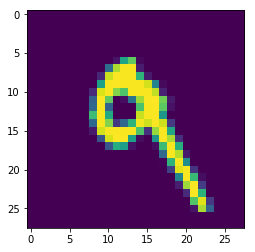

In [7]:
show_img = test_dataset.test_data[7].numpy().reshape(28,28)
label = test_dataset.test_labels[7]
print(label)
plt.imshow(show_img)


In [8]:
test_dataset.test_data[1].size()

torch.Size([28, 28])

In [9]:
batch_size=100
n_iters=3000
num_epochs = n_iters / (len(train_dataset)/batch_size)
print(num_epochs)

5.0


In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size = batch_size,
                                          shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=False)

In [11]:
import collections

In [12]:
isinstance(train_loader, collections.Iterable)

True

In [13]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:,-1,:])
        return out
        

In [23]:
input_dim = 28
hidden_dim=100
layer_dim=2
output_dim = 10
model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

In [24]:
criterion = nn.CrossEntropyLoss()

In [25]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

torch.Size([100, 28])
torch.Size([100, 100])


In [27]:
seq_dim=28
iter = 0
for epoch in range(int(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
              
        loss.backward()
        optimizer.step()
              
        
        iter = iter + 1
        if (iter % 500 ==0):
              correct = 0.0
              total = 0.0 
              for i, (images, labels) in enumerate(test_loader):
                  images = Variable(images.view(-1, seq_dim, input_dim))
                  outputs = model(images)
                  labels2 = Variable(labels)
                  _, predicted = torch.max(outputs, 1)
                  total += labels.size(0) 
                  correct += (predicted.data == labels).sum()
                  
              if(iter==500):
                    print("this is iteration 500")
                    print(outputs[0,:])
              #print("Correct: {} ".format(correct))
              #print("Total: {}".format(total))
              accuracy = 100.0 * correct*1.0/(1.0*total)
              print("Iteration:{}, Loss:{},accuracy:{}".format(iter, loss.data, accuracy) )
                
                    
        
        
        
        
        

this is iteration 500
Variable containing:
 0.9528
 0.3176
-0.0089
-0.1837
-0.8443
 0.6351
-0.1276
-3.3194
 4.1211
-2.6525
[torch.FloatTensor of size 10]

Iteration:500, Loss:
 0.7756
[torch.FloatTensor of size 1]
,accuracy:77.7
Iteration:1000, Loss:
 0.2343
[torch.FloatTensor of size 1]
,accuracy:88.65
Iteration:1500, Loss:
 0.9323
[torch.FloatTensor of size 1]
,accuracy:84.54
Iteration:2000, Loss:
 0.3054
[torch.FloatTensor of size 1]
,accuracy:92.92
Iteration:2500, Loss:
 0.2837
[torch.FloatTensor of size 1]
,accuracy:94.48
Iteration:3000, Loss:
 0.2789
[torch.FloatTensor of size 1]
,accuracy:94.24


OUTPUTS
torch.Size([100, 10])
Variable containing:
 5.6511
-3.0404
 0.0773
-5.4310
 0.5798
 2.0044
 5.7226
-2.5943
 0.3549
-1.1251
[torch.FloatTensor of size 10]

PREDICTED
6
LABELS
6


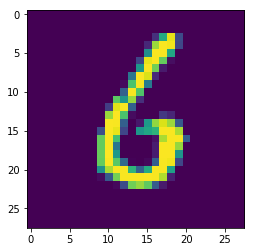

In [22]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=False)

image_num=50
iter_test=0
for i, (images, labels) in enumerate(test_loader):
     iter_test+=1
     
     images = Variable(images.view(-1, seq_dim, input_dim))
     
     outputs = model(images)
     plt.imshow(images.data[image_num].numpy().reshape(28,28))
     labels2 = Variable(labels)
     _, predicted = torch.max(outputs, 1)
     if(iter_test==1):
        print("OUTPUTS")
        print(outputs.size())
        
        print(outputs[image_num,:])
        _, predicted = torch.max(outputs.data,1)
        print("PREDICTED")
        print(predicted[image_num])
        print("LABELS")
        print(labels[image_num])
        break
        
    

In [20]:

\